In [38]:
#Get the data
import pandas
data = pandas.read_csv('data/crime_data.csv')
data

,Murder,Assault,Gun Violence
0,13.2,236,21.2
1,10.0,263,44.5
2,8.1,294,31.0
3,8.8,190,19.5
4,9.0,276,40.6
5,7.9,204,38.7
6,3.3,110,11.1
7,5.9,238,15.8
8,15.4,335,31.9
9,17.4,211,25.8


In [39]:
data.head(5)

,Murder,Assault,Gun Violence
0,13.2,236,21.2
1,10.0,263,44.5
2,8.1,294,31.0
3,8.8,190,19.5
4,9.0,276,40.6


In [40]:
data.describe()

,Murder,Assault,Gun Violence
count,50.00000,50.000000,50.000000
mean,7.78800,170.760000,21.232000
std,4.35551,83.337661,9.366385
min,0.80000,45.000000,7.300000
25%,4.07500,109.000000,15.075000
50%,7.25000,159.000000,20.100000
75%,11.25000,249.000000,26.175000
max,17.40000,337.000000,46.000000


In [41]:
#Step 1:Splitting the data into X
matrix = data.values
X= matrix[:,:]

/home/user/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/user/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/user/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/user/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

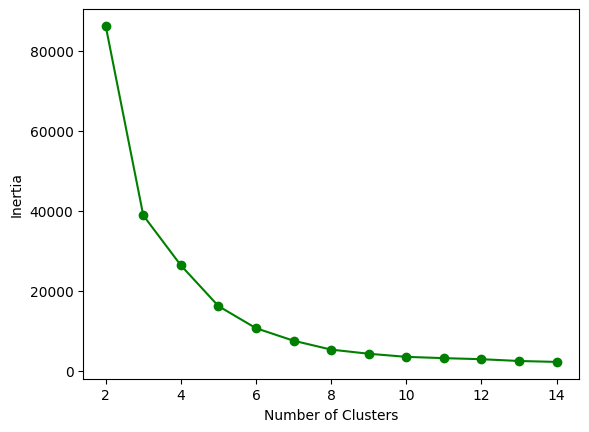

In [42]:
#Step 2 Import from KMeans
from sklearn.cluster import KMeans
inertias = []
for k in range(2,15) : 
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(2,15),inertias, "o-g")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [43]:
# Fit the data into the model and specify the clusters
model = KMeans(n_clusters=8,random_state=42)
model.fit(X)

/home/user/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(random_state=42)

In [44]:
# Get the clusters
centroids = model.cluster_centers_
centroids

array([[ 11.82222222, 250.55555556,  28.        ],
       [  5.59      , 112.4       ,  17.27      ],
       [ 11.5       , 195.33333333,  27.43333333],
       [ 10.84      , 286.8       ,  30.8       ],
       [  5.75      , 156.75      ,  19.4       ],
       [  2.53333333,  50.83333333,  11.71666667],
       [ 14.2       , 336.        ,  24.        ],
       [  3.575     ,  80.5       ,  11.2       ]])

In [45]:
# Print the clusters
clusters = pandas.DataFrame(centroids,columns=['Murder','Assault','Gun Violence'])
clusters

,Murder,Assault,Gun Violence
0,11.822222,250.555556,28.000000
1,5.590000,112.400000,17.270000
2,11.500000,195.333333,27.433333
3,10.840000,286.800000,30.800000
4,5.750000,156.750000,19.400000
5,2.533333,50.833333,11.716667
6,14.200000,336.000000,24.000000
7,3.575000,80.500000,11.200000


In [46]:
data['Cluster_Group'] = model.labels_
data

,Murder,Assault,Gun Violence,Cluster_Group
0,13.2,236,21.2,0
1,10.0,263,44.5,0
2,8.1,294,31.0,3
3,8.8,190,19.5,2
4,9.0,276,40.6,3
5,7.9,204,38.7,2
6,3.3,110,11.1,1
7,5.9,238,15.8,0
8,15.4,335,31.9,6
9,17.4,211,25.8,2


In [47]:
cluster0 = data[data['Cluster_Group'] == 0]
cluster0.shape

(9, 4)

In [48]:
data.groupby('Cluster_Group')['Murder'].mean().sort_values(ascending = False)


Cluster_Group
6    14.200000
0    11.822222
2    11.500000
3    10.840000
4     5.750000
1     5.590000
7     3.575000
5     2.533333
Name: Murder, dtype: float64

In [49]:
data.groupby('Cluster_Group')['Assault'].count().sort_values(ascending = False)


Cluster_Group
1    10
0     9
4     8
2     6
5     6
3     5
7     4
6     2
Name: Assault, dtype: int64

In [51]:
violence = pandas.DataFrame(data.groupby('Cluster_Group')['Murder'].mean())
violence

,Murder
Cluster_Group,
0,11.822222
1,5.590000
2,11.500000
3,10.840000
4,5.750000
5,2.533333
6,14.200000
7,3.575000
